## Notebook by HARI PRASATH V

## Task Explanation

As a business manager, try to find out the weak areas where you can work to
make more profit. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. What all business problems you can derive by exploring the data?

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Our data has the following columns:

1) Ship mode    - Class of the product

2) Segment      - Consumer, Corporate, Homeoffice

3) Country      - Country of the shop

4) City         - City of the shop

5) State        - State of the shop

6) Postal code  - Postal code

7) Region       - North, South , West, East, Central

8) Category     - Category of the sales (Furniture, Office Suplies) 

9) Sub-category - Sub-category of the sale(Bookcase, Chairs,..)

10) Sales       - Amount of sales in the store 

11) Quantity    - Quantiy of the sale

12) Discount    - Discount offered to the customer

13) Profit      - Profit made by the store


## Data Preparation

lets check for missing values.

In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

there seemed to be no missing values. Next look at the data type of each column and descriptive statistics of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## Exploratory Data Analysis

Let's study about the distribution of data first. This is important because it may bias our decision.

In [6]:
org_df = data.groupby(by = ['State', 'City', 'Region', 'Category']).sum()
org_df

Postal Code     Sales  Quantity  \
State     City       Region  Category                                           
Alabama   Auburn     South   Furniture              36830   350.980         1   
                             Office Supplies       184150  1415.850        15   
          Decatur    South   Furniture              35601  1215.920         8   
                             Office Supplies       249207   340.080        25   
                             Technology            178005  1818.820        19   
...                                                   ...       ...       ...   
Wisconsin Waukesha   Central Office Supplies        53186    54.500         5   
          Wausau     Central Office Supplies       217604   317.480        14   
          West Allis Central Furniture              53214   241.960         2   
                             Office Supplies        53214     8.520         3   
Wyoming   Cheyenne   West    Furniture              82001  1603.136         4   

                                              Discount    Profit  
State     City       Region  Category                             
Alabama   Auburn     South   Furniture             0.0   84.2352  
                             Office Supplies       0.0  368.3719  
          Decatur    South   Furniture             0.0  316.1392  
                             Office Supplies       0.0  114.1264  
                             Technology            0.0  569.8225  
...                                                ...       ...  
Wisconsin Waukesha   Central Office Supplies       0.0   14.1700  
          Wausau     Central Office Supplies       0.0   90.4306  
          West Allis Central Furniture             0.0   24.1960  
                             Office Supplies       0.0    4.1748  
Wyoming   Cheyenne   West    Furniture             0.2  100.1960  

[1370 rows x 5 columns]

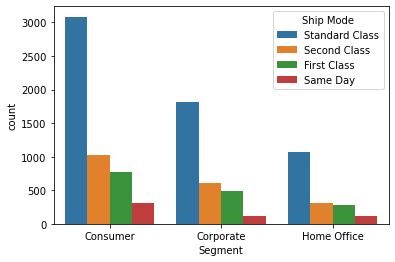

In [7]:
sns.countplot('Segment', hue = 'Ship Mode', 
             hue_order =data['Ship Mode'].value_counts().index,
              data = data)

It seems that majority of the segment of the customer is of consumer and mainly of the Standard Class Ship Mode. 

In [8]:
def countplot(feature, ascending = False, title=None):
    '''Plots a horizontal bar plot'''
    plt.subplots(figsize =[10,10])
    sns.countplot(y = feature, data = data, order = data[feature].value_counts().index)
    if title is not None:
        plt.title(title)
    for i, v in data[feature].value_counts(ascending = ascending).reset_index().iterrows():
        plt.text(v.values[1],i, str(v.values[1]))

def barplot_w_annote(data, x, y, title, figsize= [10, 90]):
    plt.subplots(figsize = figsize)
    ax = sns.barplot(x = x,y = y ,data = data)
    plt.title(title)
    for i, v in data.iterrows():
        if i ==0:
            print(i, v)
        ax.text(v.values[1], i,
                '{:.2f}'.format(v.values[1]))

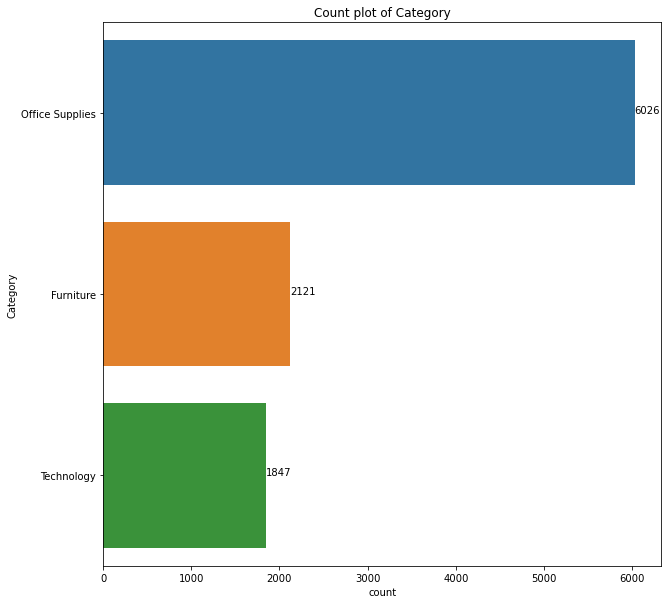

In [9]:
countplot('Category', title = 'Count plot of Category')

The Office Supplies category products were sold more in average in all the shops.

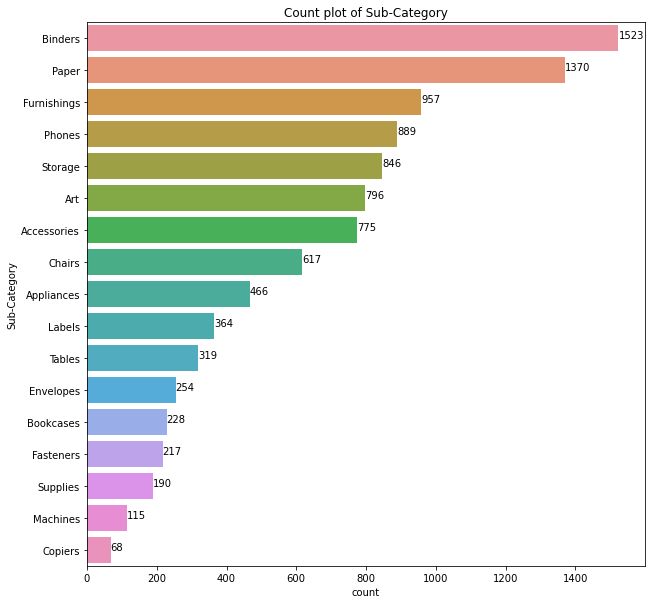

In [10]:
countplot('Sub-Category', title = 'Count plot of Sub-Category')

Binders and papers were sold more in all stores.

In [11]:
temp_data = data[['Profit', 'City']].groupby('City', as_index = False).sum().sort_values('Profit').reset_index(drop =True)
temp_data.head()

,City,Profit
0,Philadelphia,-13837.7674
1,Houston,-10153.5485
2,San Antonio,-7299.0502
3,Lancaster,-7239.0684
4,Chicago,-6654.5688


0 City      Philadelphia
Profit        -13837.8
Name: 0, dtype: object


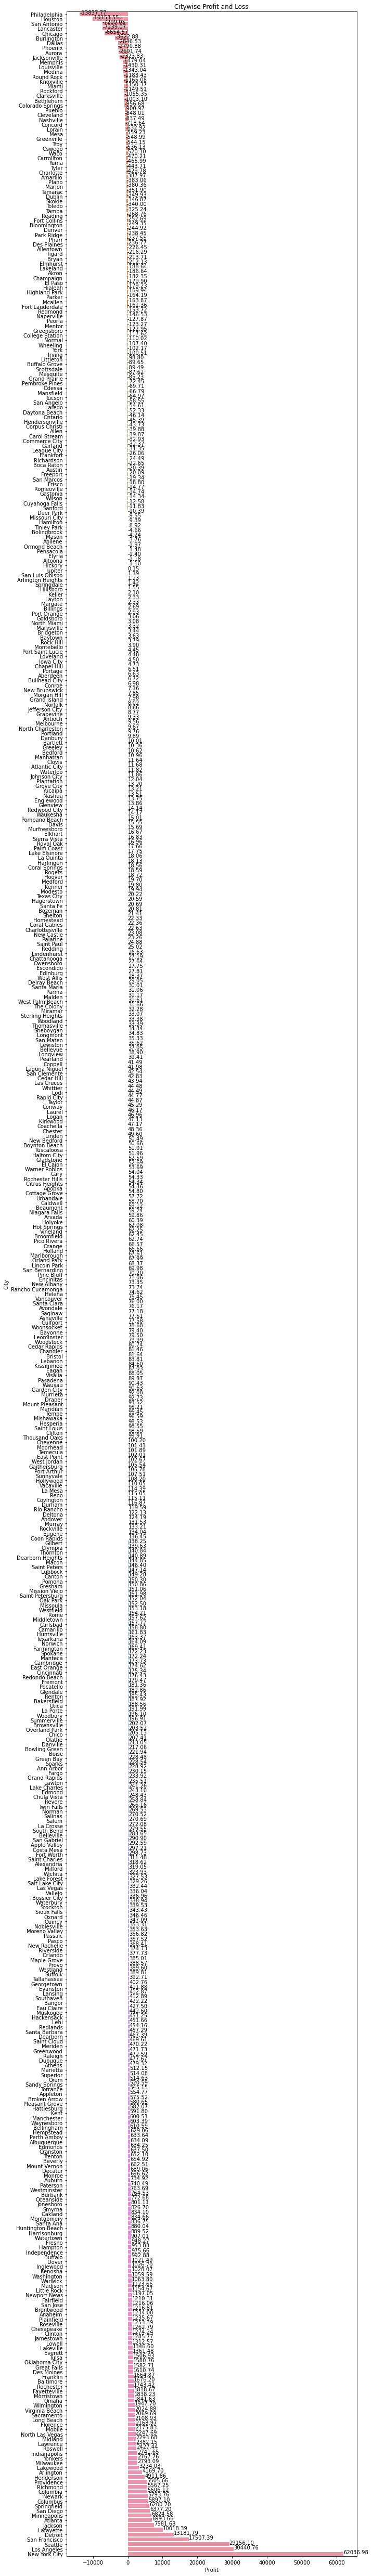

In [12]:
barplot_w_annote(temp_data, 'Profit', 'City', 'Citywise Profit and Loss', [10, 90])

The above plot depicts the profits made in various cities. From the plot it has been seen that there were loss in some cities. Let's look closer at the loss and profit separately.

In [13]:
neg_profit = temp_data[temp_data['Profit'] <= 0]
neg_profit

,City,Profit
0,Philadelphia,-13837.7674
1,Houston,-10153.5485
2,San Antonio,-7299.0502
3,Lancaster,-7239.0684
4,Chicago,-6654.5688
...,...,...
111,Ormond Beach,-1.9656
112,Pensacola,-1.4760
113,Elyria,-1.3984
114,Altoona,-1.1835


0 City      Philadelphia
Profit        -13837.8
Name: 0, dtype: object


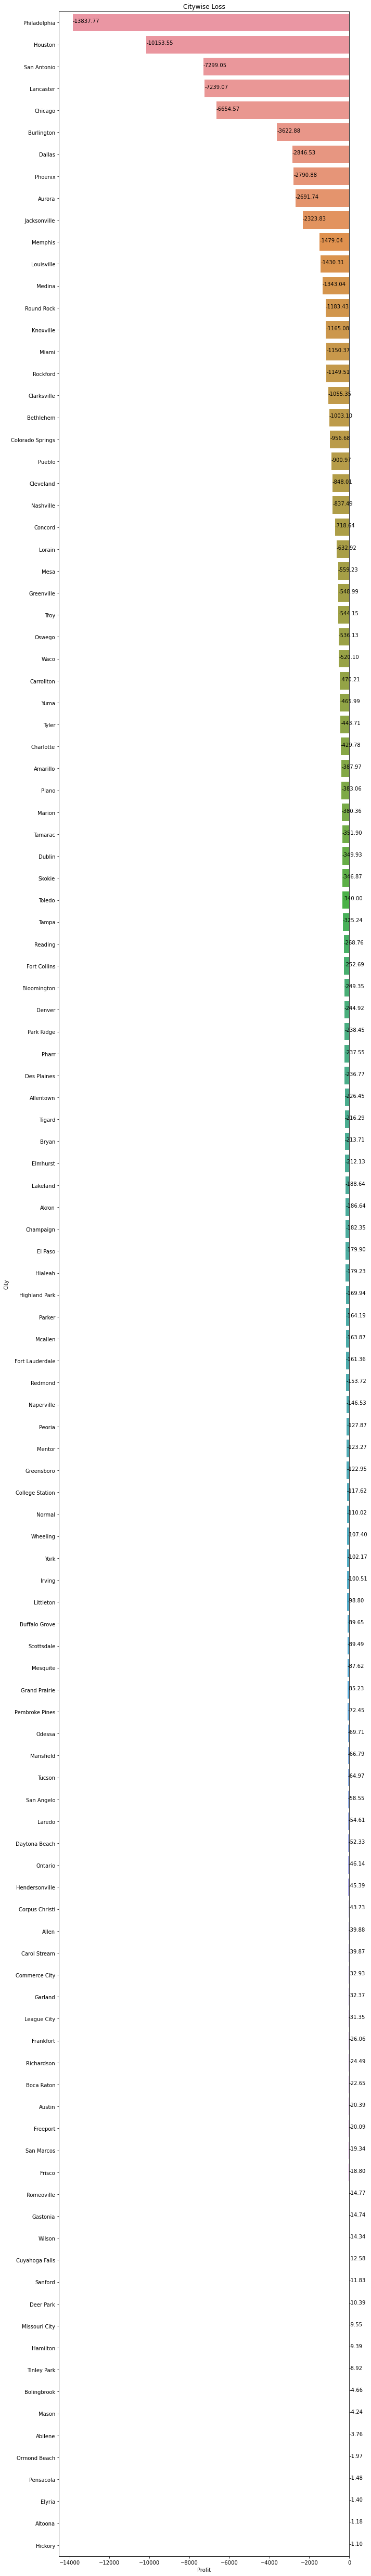

In [14]:
barplot_w_annote(neg_profit, 'Profit', 'City', 'Citywise Loss')

The plot shows the value losses associated with each city. As for profits, it is shown in the plot below.

0 City      New York City
Profit            62037
Name: 0, dtype: object


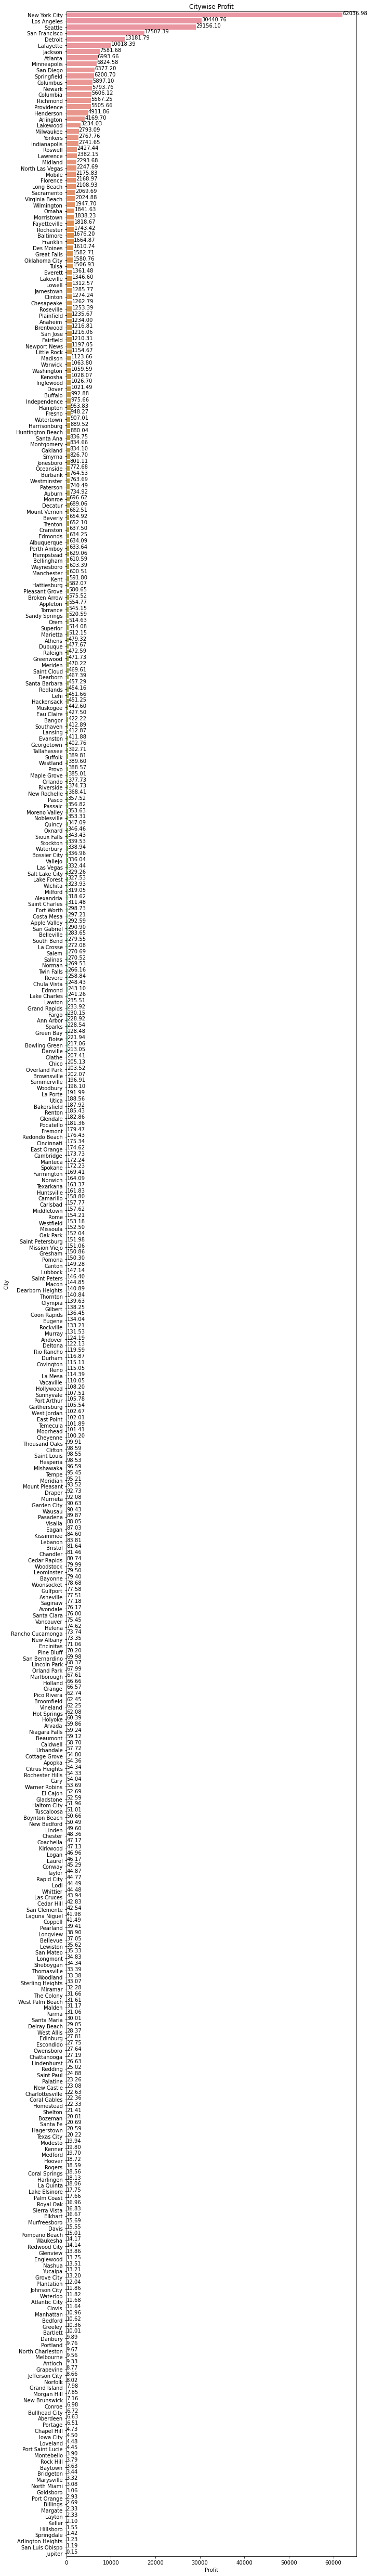

In [15]:
pos_profit = temp_data[temp_data['Profit'] > 0].sort_values('Profit', ascending = False).reset_index(drop = True)
barplot_w_annote(pos_profit, 'Profit', 'City', 'Citywise Profit')

From the plot, highest profit is made in the New York city.

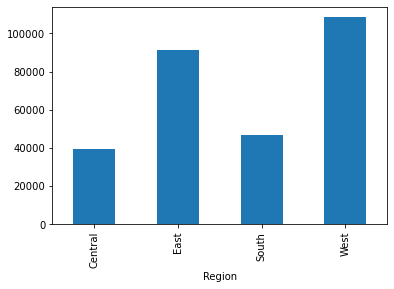

In [16]:
data.groupby('Region').sum()['Profit'].plot(kind = 'bar')

If we were to consider the regionwise profit, West region makes the most profit though New York City which is the city with highest Profit, is in the East region.

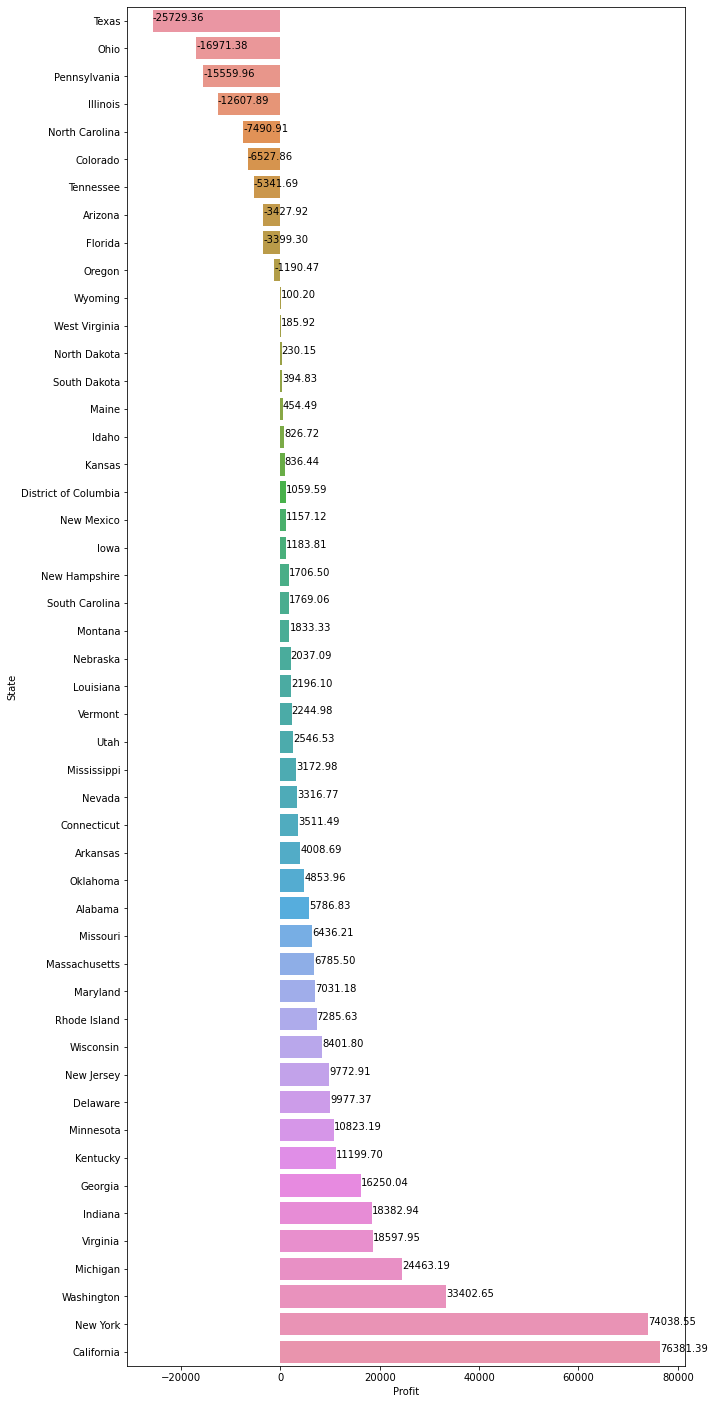

In [17]:
t = data[['State', 'Profit']].groupby('State', as_index = False).sum().sort_values('Profit').reset_index(drop = True)
plt.subplots(figsize= (10, 25))
sns.barplot(data = t, x = 'Profit', y = 'State')
for i, v in t.iterrows():
    plt.text(v.values[1], i, '{:0.2f}'.format(v.values[1]))

In [18]:
pro_dis = data[['City', 'Discount', 'Profit']].groupby('City').sum().sort_values('Profit')
pro_dis.head(10)

,Discount,Profit
City,,
Philadelphia,175.50,-13837.7674
Houston,143.14,-10153.5485
San Antonio,22.60,-7299.0502
Lancaster,14.50,-7239.0684
Chicago,120.50,-6654.5688
Burlington,3.40,-3622.8772
Dallas,56.30,-2846.5257
Phoenix,22.30,-2790.8832
Aurora,24.00,-2691.7386


(array([516.,   7.,   3.,   2.,   0.,   0.,   1.,   0.,   1.,   1.]),
 array([  0.  ,  17.55,  35.1 ,  52.65,  70.2 ,  87.75, 105.3 , 122.85,
        140.4 , 157.95, 175.5 ]),
 <a list of 10 Patch objects>)

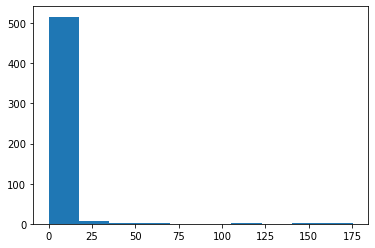

In [19]:
plt.hist(pro_dis['Discount'])

There is slight negative correlation between Profit and Discount meaning the Profit decreases the increase in discount.

In [20]:
data.corr()['Profit']

Postal Code   -0.029961
Sales          0.479064
Quantity       0.066253
Discount      -0.219487
Profit         1.000000
Name: Profit, dtype: float64

-0.2 correlation is considered as weak and unimportant.

(array([516.,   7.,   3.,   2.,   0.,   0.,   1.,   0.,   1.,   1.]),
 array([  0.  ,  17.55,  35.1 ,  52.65,  70.2 ,  87.75, 105.3 , 122.85,
        140.4 , 157.95, 175.5 ]),
 <a list of 10 Patch objects>)

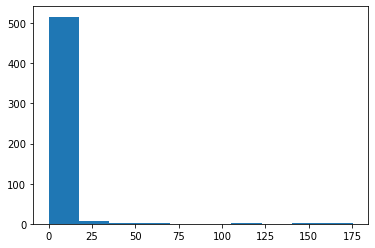

In [21]:
plt.hist(pro_dis['Discount'])

(array([4798.,  146., 3657.,  227.,   27.,  217.,   66.,  138.,  418.,
         300.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ]),
 <a list of 10 Patch objects>)

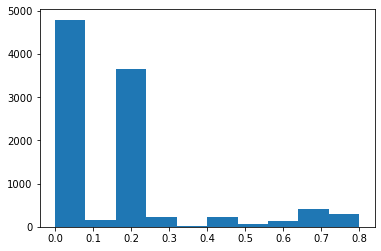

In [22]:
plt.hist(data['Discount'])

The max discount provided for an item is 0.8 dollar and citywise the max discount provided on all products is 175 dollars.

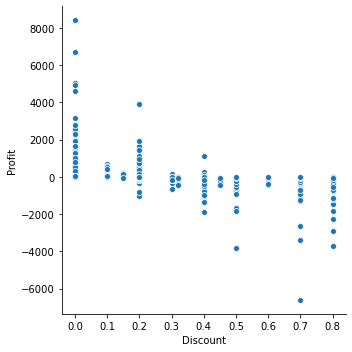

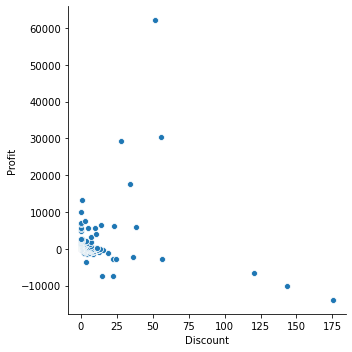

In [23]:
sns.relplot(x = 'Discount',  y= 'Profit', data = data, kind = 'scatter')
sns.relplot(x = 'Discount',  y= 'Profit', data = pro_dis, kind = 'scatter')

An interesting thing to notice is that if the discount is greater than 0.4 for a particular product it is likely to contribute to loss of the store.

In [24]:
index =temp_data[:10]['City'].values
d = data[data['City'].isin(index)].groupby(['City', 'Category', 'Sub-Category'],as_index = False).sum().sort_values('Profit').reset_index(drop = True)
d.head()

,City,Category,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Houston,Office Supplies,Binders,4623764,4301.942,229,48.0,-6894.6390
1,Lancaster,Technology,Machines,43130,4499.985,5,0.7,-6599.9780
2,Chicago,Office Supplies,Binders,2849652,3168.330,182,37.6,-4911.3644
3,San Antonio,Office Supplies,Binders,860277,2489.648,48,8.8,-4204.7558
4,Burlington,Technology,Machines,27217,7999.980,4,0.5,-3839.9904


Text(0.5, 1.0, 'Categorywise loss in top 10 cities')

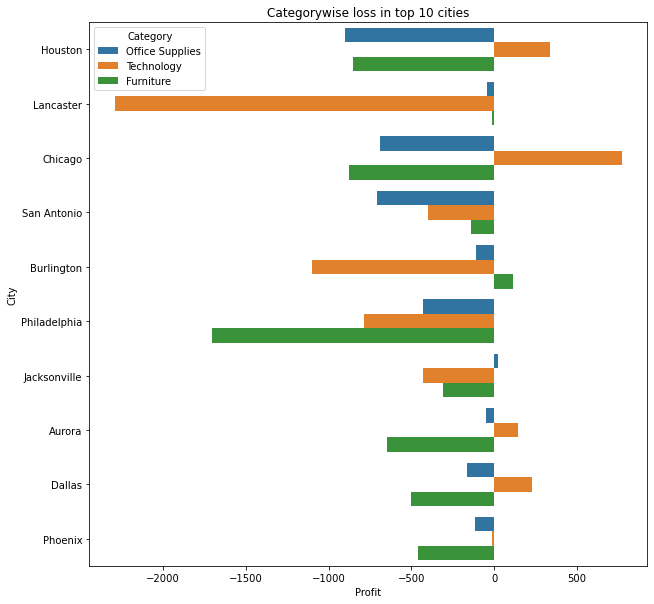

In [25]:
plt.subplots(figsize = (10, 10))
sns.barplot(y='City', x ='Profit', hue = 'Category', data = d, ci = None)
plt.title('Categorywise loss in top 10 cities')

## Summary

1) Majority of the segment of the customer is of consumer and mainly of the Standard Class Ship Mode.

2) Citywise, Philadelphia has the worst profit with -13k overall  and New York City has the highest profit with 62k overall.

3) While Statewise California has the highest profit.

4) The most sold category is Office Supplies and the subcategory is Binders.

5) There is a weak correlation between Profit and Discount. The MAX discount offered for a product is 0.8 cents. It is advisable to not offer more than 0.4 cents for a pruchase as it likely contributes to loss.

6) In lancaster, it is suugested to review selling technology category products, since it is the major reason for the loss in the sale.

7) In Chicago, Dallas, Aurora and Houstan, the technolgy category products has made some noteable profit though other category has losses associated with it.
